# Car Sales Prediction and Classification

## Step 1: Reading and Understanding the Data

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =8
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [217]:
# Read the data from csv file

df = pd.read_csv('Cars Mock Data.csv')

In [191]:
df.head()

,Make,Model,Nickname,Buyer Gender,Buyer Age,Buzzword,Color,Purchase Date,Sale Price,Discount,...,Top Speed,0-60 Time,Free Addons,Sale,Fuel,Body,Drive,Engine Size,Bhp,Doors
0,Suzuki,Vitara,Philippine,Female,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,...,200.9,11.5,YES,True,Petrol,SUV,RWD,1.5,91.18,5
1,Honda,S2000,Henrik,Male,30,analyzing,Crimson,26-10-2015,51826.30,31.47,...,158.5,8.8,YES,True,Petrol,Roadster,RWD,2.0,237.00,2
2,BMW,Z4,Lebbie,Female,54,software,Khaki,28-03-2010,82929.14,54.14,...,149.5,14.4,YES,True,Petrol,Convertible,RWD,3.0,335.00,2
3,Toyota,Tacoma,Jefferey,Male,68,monitoring,Puce,07-05-2008,56928.66,8.50,...,153.3,11.5,NO,False,Petrol,Pickup truck,AWD,2.7,159.00,2
4,Ford,Festiva,Glendon,Male,70,Sharable,Yellow,01-06-2008,77201.26,16.42,...,122.0,14.9,YES,True,Petrol,Hatchback,RWD,1.3,197.00,3


In [192]:
# checking the shape of dataframe

df.shape

(49, 22)

In [193]:
# describing the columns of dataframe

df.describe()

,Buyer Age,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time,Engine Size,Bhp,Doors
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,48.183673,49854.965306,30.310816,22568.012245,0.122449,166.151020,9.004082,3.357143,225.092653,3.265306
std,15.748907,28858.902750,18.292946,14989.810391,0.074233,35.844735,3.292223,1.712333,118.849078,1.254583
min,20.000000,10490.640000,6.370000,2989.280000,0.010000,120.300000,2.500000,1.300000,91.000000,2.000000
25%,37.000000,19305.500000,16.230000,9532.580000,0.060000,136.500000,6.800000,2.400000,156.000000,2.000000
50%,48.000000,54543.150000,27.720000,20175.470000,0.120000,155.000000,8.800000,3.000000,194.000000,3.000000
75%,65.000000,74986.420000,41.140000,33634.370000,0.180000,193.400000,11.900000,4.000000,283.000000,4.000000
max,75.000000,98635.220000,69.370000,69656.300000,0.240000,248.700000,14.900000,8.400000,645.000000,5.000000


In [194]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               49 non-null     object 
 1   Model              49 non-null     object 
 2   Nickname           49 non-null     object 
 3   Buyer Gender       49 non-null     object 
 4   Buyer Age          49 non-null     int64  
 5   Buzzword           49 non-null     object 
 6   Color              49 non-null     object 
 7   Purchase Date      49 non-null     object 
 8   Sale Price         49 non-null     float64
 9   Discount           49 non-null     float64
 10  Resell Price       49 non-null     float64
 11  5-yr Depreciation  49 non-null     float64
 12  Top Speed          49 non-null     float64
 13  0-60 Time          49 non-null     float64
 14  Free Addons        49 non-null     object 
 15  Sale               49 non-null     bool   
 16  Fuel               49 non-nu

In [195]:
# checking for the null values in column data

df.isnull().sum()

Make                 0
Model                0
Nickname             0
Buyer Gender         0
Buyer Age            0
Buzzword             0
Color                0
Purchase Date        0
Sale Price           0
Discount             0
Resell Price         0
5-yr Depreciation    0
Top Speed            0
0-60 Time            0
Free Addons          0
Sale                 0
Fuel                 0
Body                 0
Drive                0
Engine Size          0
Bhp                  0
Doors                0
dtype: int64

In [218]:
df.columns = df.columns.str.replace(' ', '_')

In [219]:
# dropping the unwanted columns

df.drop(['Nickname'],axis=1,inplace=True)

In [220]:
df.head()

,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,Female,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,YES,True,Petrol,SUV,RWD,1.5,91.18,5
1,Honda,S2000,Male,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,YES,True,Petrol,Roadster,RWD,2.0,237.00,2
2,BMW,Z4,Female,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,YES,True,Petrol,Convertible,RWD,3.0,335.00,2
3,Toyota,Tacoma,Male,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,NO,False,Petrol,Pickup truck,AWD,2.7,159.00,2
4,Ford,Festiva,Male,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,YES,True,Petrol,Hatchback,RWD,1.3,197.00,3


In [221]:
# Encoding/mapping the sale column

df["Sale"] = df["Sale"].astype(int)

In [199]:
df.head()

,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,Female,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,YES,1,Petrol,SUV,RWD,1.5,91.18,5
1,Honda,S2000,Male,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,YES,1,Petrol,Roadster,RWD,2.0,237.00,2
2,BMW,Z4,Female,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,YES,1,Petrol,Convertible,RWD,3.0,335.00,2
3,Toyota,Tacoma,Male,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,NO,0,Petrol,Pickup truck,AWD,2.7,159.00,2
4,Ford,Festiva,Male,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,YES,1,Petrol,Hatchback,RWD,1.3,197.00,3


## Step 2: Visualising the Data

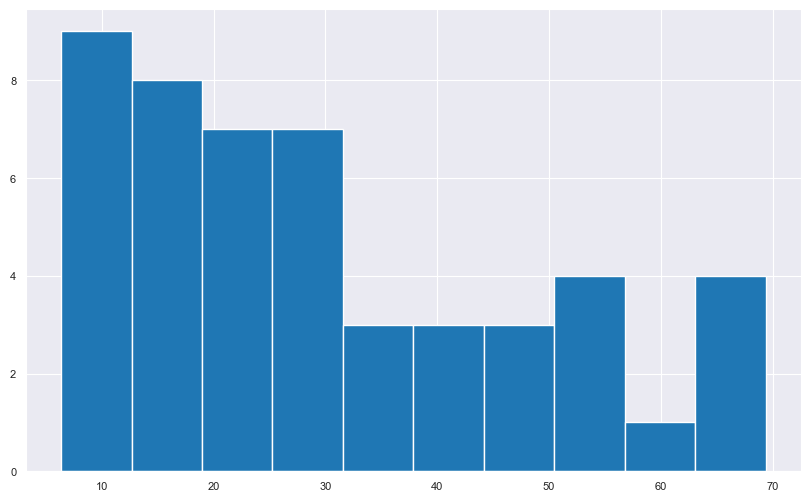

In [200]:

plt.hist(df["Discount"],10);

<AxesSubplot:xlabel='Discount', ylabel='Density'>

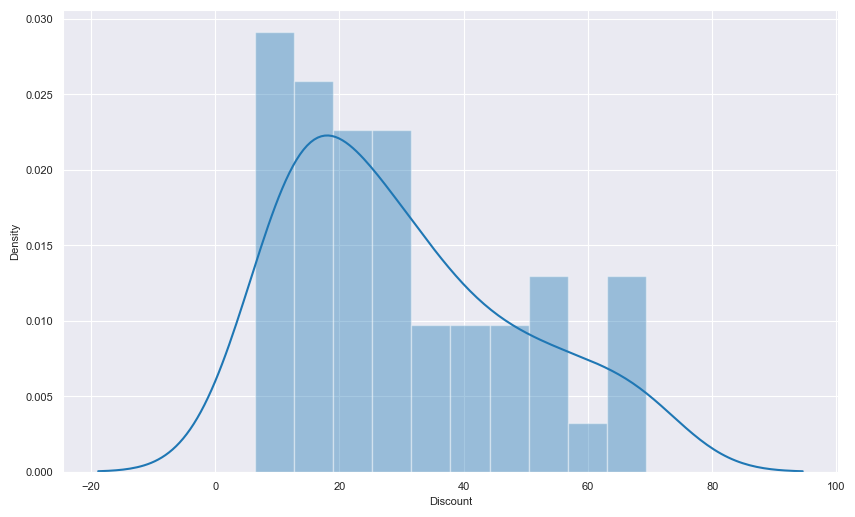

In [83]:
sns.distplot(df['Discount'],10)

In [201]:
# Counting it by its category
make_dist = df.groupby('Make').size();
make_dist

Make
Acura            1
Audi             1
BMW              2
Buick            5
Cadillac         1
Chevrolet        2
Citroën          1
Dodge            2
Ford             4
GMC              2
Honda            1
Infiniti         2
Isuzu            1
Land Rover       1
Lexus            1
Maserati         1
Mazda            1
Mercedes-Benz    2
Mercury          1
Mitsubishi       1
Nissan           1
Plymouth         1
Pontiac          3
Porsche          1
Ram              1
Saab             1
Scion            2
Subaru           1
Suzuki           1
Toyota           2
Volkswagen       1
Volvo            1
dtype: int64

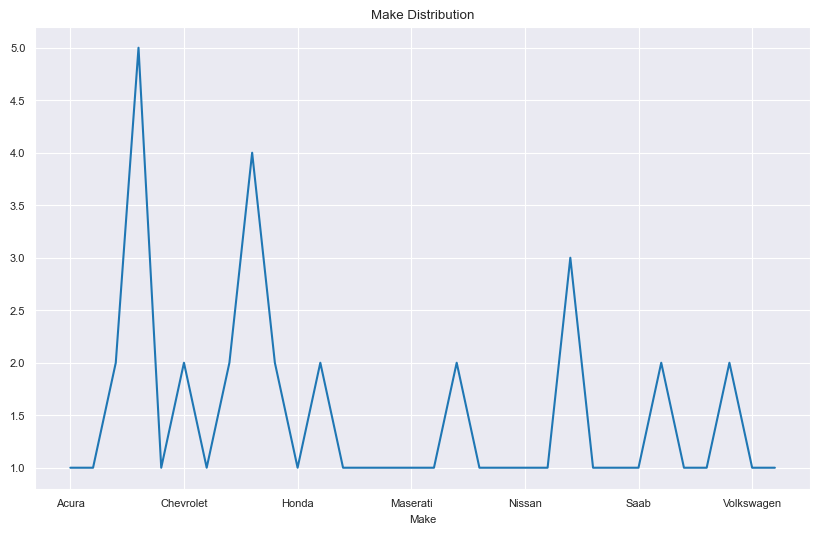

In [205]:
make_dist.plot(title = 'Make Distribution');

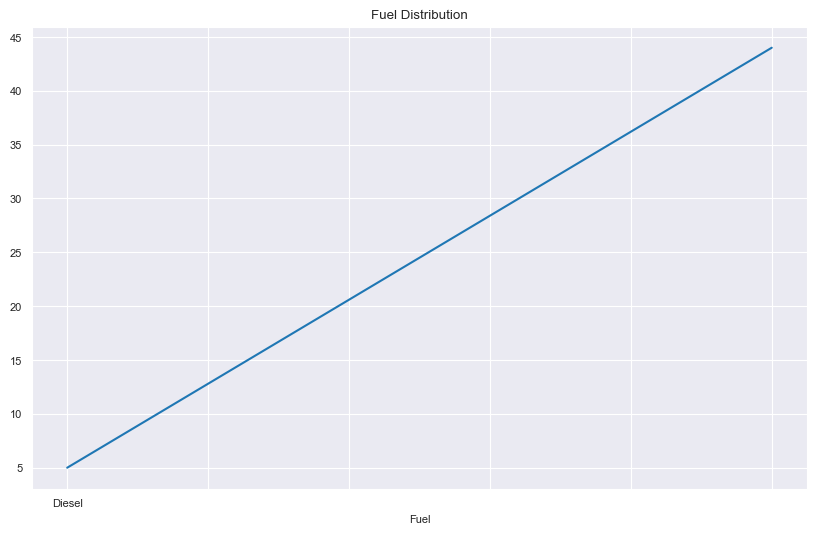

In [204]:
fuel_dist = df.groupby('Fuel').size();
fuel_dist.plot(title = 'Fuel Distribution');

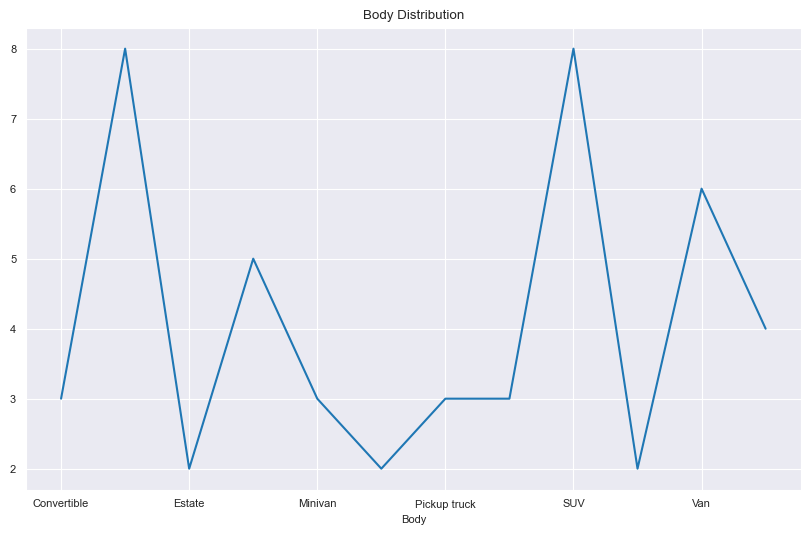

In [208]:

Body_dist = df.groupby('Body').size();
Body_dist.plot(title = 'Body Distribution');

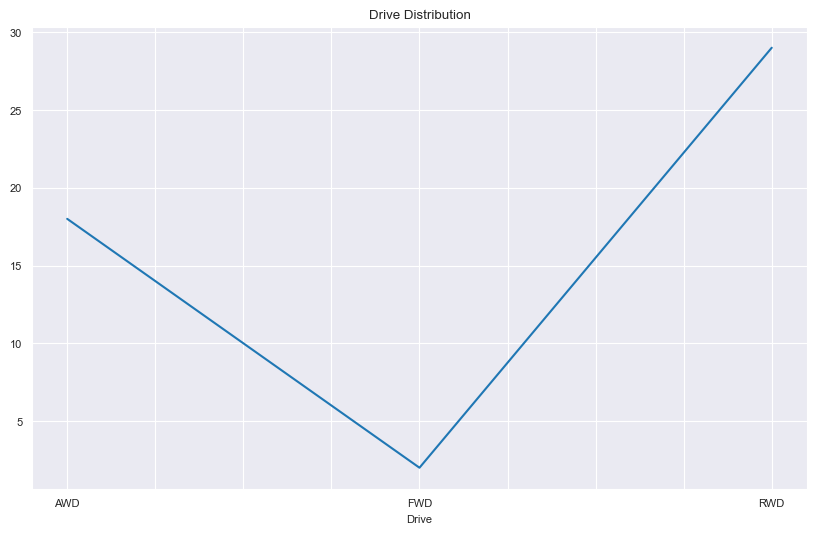

In [209]:
drive_dist = df.groupby('Drive').size();
drive_dist.plot(title = 'Drive Distribution');

In [222]:
df.head()

,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,Female,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,YES,1,Petrol,SUV,RWD,1.5,91.18,5
1,Honda,S2000,Male,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,YES,1,Petrol,Roadster,RWD,2.0,237.00,2
2,BMW,Z4,Female,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,YES,1,Petrol,Convertible,RWD,3.0,335.00,2
3,Toyota,Tacoma,Male,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,NO,0,Petrol,Pickup truck,AWD,2.7,159.00,2
4,Ford,Festiva,Male,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,YES,1,Petrol,Hatchback,RWD,1.3,197.00,3


In [223]:
df['Buyer_Gender'] = df['Buyer_Gender'].map({'Female': 1, 'Male': 0})


,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,1,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,YES,1,Petrol,SUV,RWD,1.5,91.18,5
1,Honda,S2000,0,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,YES,1,Petrol,Roadster,RWD,2.0,237.00,2
2,BMW,Z4,1,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,YES,1,Petrol,Convertible,RWD,3.0,335.00,2
3,Toyota,Tacoma,0,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,NO,0,Petrol,Pickup truck,AWD,2.7,159.00,2
4,Ford,Festiva,0,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,YES,1,Petrol,Hatchback,RWD,1.3,197.00,3


In [225]:
df['Free_Addons'] = df['Free_Addons'].map({'YES': 1, 'NO': 0})
df.head()

,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,1,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,1,1,Petrol,SUV,RWD,1.5,91.18,5
1,Honda,S2000,0,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,1,1,Petrol,Roadster,RWD,2.0,237.00,2
2,BMW,Z4,1,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,1,1,Petrol,Convertible,RWD,3.0,335.00,2
3,Toyota,Tacoma,0,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,0,0,Petrol,Pickup truck,AWD,2.7,159.00,2
4,Ford,Festiva,0,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,1,1,Petrol,Hatchback,RWD,1.3,197.00,3


In [226]:
df['Drive'] = df['Drive'].map({'RWD': 2, 'AWD': 1, 'FWD':2})
df.head()

,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,1,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,1,1,Petrol,SUV,2,1.5,91.18,5
1,Honda,S2000,0,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,1,1,Petrol,Roadster,2,2.0,237.00,2
2,BMW,Z4,1,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,1,1,Petrol,Convertible,2,3.0,335.00,2
3,Toyota,Tacoma,0,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,0,0,Petrol,Pickup truck,1,2.7,159.00,2
4,Ford,Festiva,0,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,1,1,Petrol,Hatchback,2,1.3,197.00,3


In [227]:

df_num = df.select_dtypes(include = ['float64' , 'int64']);
df_num.head(9)

,Buyer_Gender,Buyer_Age,Sale_Price,Discount,Resell_Price,5-yr_Depreciation,Top_Speed,0-60_Time,Free_Addons,Drive,Engine_Size,Bhp,Doors
0,1,51,54806.14,24.67,33858.32,0.13,200.9,11.5,1,2,1.5,91.18,5
1,0,30,51826.30,31.47,2989.28,0.02,158.5,8.8,1,2,2.0,237.00,2
2,1,54,82929.14,54.14,35049.16,0.24,149.5,14.4,1,2,3.0,335.00,2
3,0,68,56928.66,8.50,8236.15,0.20,153.3,11.5,0,1,2.7,159.00,2
4,0,70,77201.26,16.42,32765.76,0.18,122.0,14.9,1,2,1.3,197.00,3
5,1,70,50882.23,69.13,38576.59,0.16,182.7,9.6,0,2,3.0,125.00,2
6,0,66,69680.54,16.57,27962.25,0.18,231.8,5.3,1,1,5.6,320.00,5
7,0,37,56393.91,10.06,29157.95,0.14,144.1,4.7,0,1,3.6,283.00,3
8,0,43,13797.81,21.26,4740.87,0.01,223.3,5.8,0,1,4.3,194.00,4


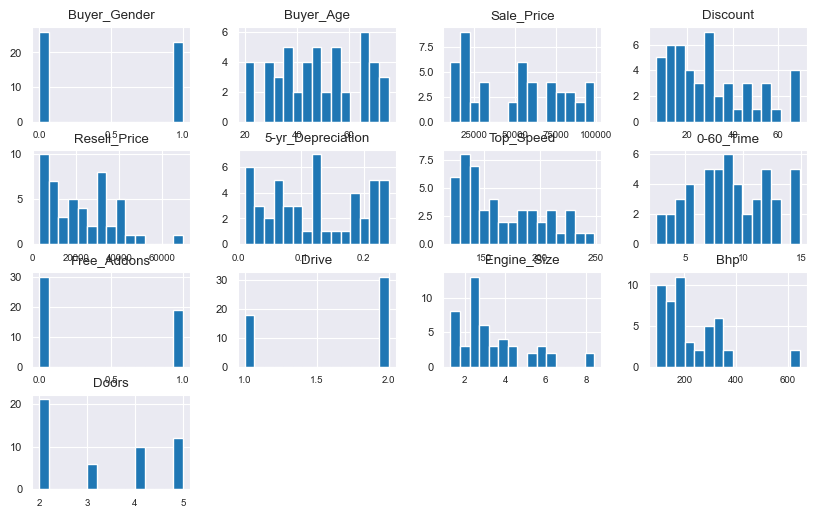

In [228]:
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (10,6)
df_num.hist(bins=15,xlabelsize=7);

In [229]:
df_corr = df_num.corr()['Sale_Price'][:-1]
df_corr

Buyer_Gender         0.237658
Buyer_Age            0.072065
Sale_Price           1.000000
Discount             0.296836
Resell_Price         0.642351
5-yr_Depreciation   -0.022837
Top_Speed            0.059524
0-60_Time           -0.367024
Free_Addons          0.094451
Drive                0.244536
Engine_Size         -0.181707
Bhp                 -0.082893
Name: Sale_Price, dtype: float64

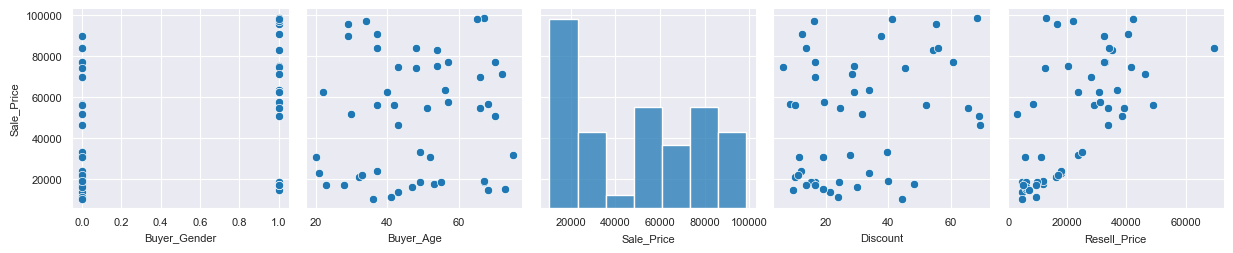

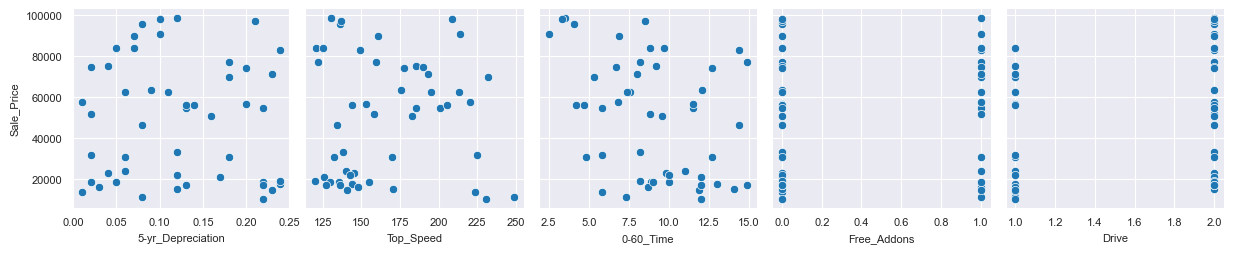

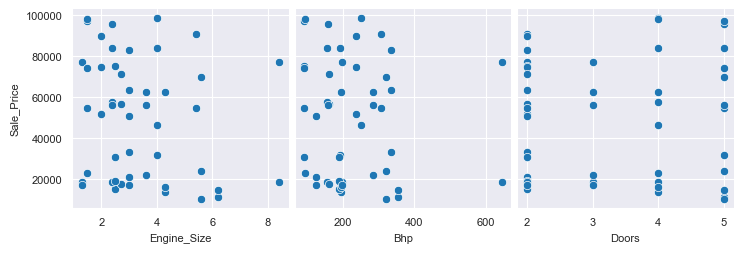

In [230]:
for i in range(0,len(df_num.columns),5):
    sns.pairplot(df_num, y_vars = 'Sale_Price', x_vars = df_num.columns[i:i+5])

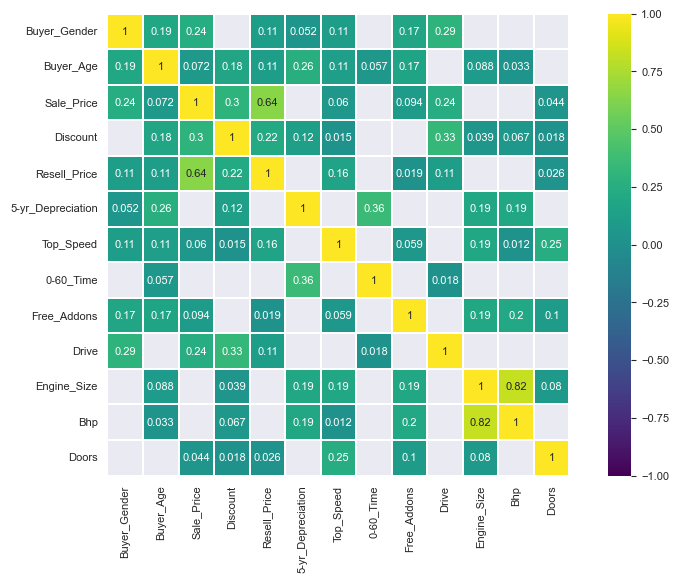

In [231]:
corr = df_num.corr()
sns.heatmap(corr[(corr>=0.01)],
           cmap= 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
           annot = True, annot_kws={"size":8}, square =True);

##### Test Train Split

In [232]:
df.head()

,Make,Model,Buyer_Gender,Buyer_Age,Buzzword,Color,Purchase_Date,Sale_Price,Discount,Resell_Price,...,Top_Speed,0-60_Time,Free_Addons,Sale,Fuel,Body,Drive,Engine_Size,Bhp,Doors
0,Suzuki,Vitara,1,51,User-friendly,Yellow,19-07-2009,54806.14,24.67,33858.32,...,200.9,11.5,1,1,Petrol,SUV,2,1.5,91.18,5
1,Honda,S2000,0,30,analyzing,Crimson,26-10-2015,51826.30,31.47,2989.28,...,158.5,8.8,1,1,Petrol,Roadster,2,2.0,237.00,2
2,BMW,Z4,1,54,software,Khaki,28-03-2010,82929.14,54.14,35049.16,...,149.5,14.4,1,1,Petrol,Convertible,2,3.0,335.00,2
3,Toyota,Tacoma,0,68,monitoring,Puce,07-05-2008,56928.66,8.50,8236.15,...,153.3,11.5,0,0,Petrol,Pickup truck,1,2.7,159.00,2
4,Ford,Festiva,0,70,Sharable,Yellow,01-06-2008,77201.26,16.42,32765.76,...,122.0,14.9,1,1,Petrol,Hatchback,2,1.3,197.00,3


In [233]:
x = df.drop(['Make','Model','Sale','Buzzword','Purchase_Date','Color','Fuel','Body'], axis = 1)
y = df['Sale'].copy()

In [234]:
x.head()

,Buyer_Gender,Buyer_Age,Sale_Price,Discount,Resell_Price,5-yr_Depreciation,Top_Speed,0-60_Time,Free_Addons,Drive,Engine_Size,Bhp,Doors
0,1,51,54806.14,24.67,33858.32,0.13,200.9,11.5,1,2,1.5,91.18,5
1,0,30,51826.30,31.47,2989.28,0.02,158.5,8.8,1,2,2.0,237.00,2
2,1,54,82929.14,54.14,35049.16,0.24,149.5,14.4,1,2,3.0,335.00,2
3,0,68,56928.66,8.50,8236.15,0.20,153.3,11.5,0,1,2.7,159.00,2
4,0,70,77201.26,16.42,32765.76,0.18,122.0,14.9,1,2,1.3,197.00,3


In [235]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Sale, dtype: int32

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state=50)
x_train.shape, x_test.shape

((34, 13), (15, 13))

In [238]:
y_train.head()

47    1
15    1
36    1
29    1
0     1
Name: Sale, dtype: int32

In [239]:
x_train.head()

,Buyer_Gender,Buyer_Age,Sale_Price,Discount,Resell_Price,5-yr_Depreciation,Top_Speed,0-60_Time,Free_Addons,Drive,Engine_Size,Bhp,Doors
47,0,20,30807.01,19.02,5822.22,0.06,170.0,4.8,0,2,2.5,188.00,2
15,0,21,23110.07,33.85,17916.47,0.04,145.4,9.8,0,2,1.5,92.00,4
36,0,52,31017.64,11.39,11061.65,0.18,132.6,12.7,1,1,2.5,91.00,2
29,1,57,57747.61,19.35,31158.31,0.01,220.2,6.8,1,2,2.4,156.00,4
0,1,51,54806.14,24.67,33858.32,0.13,200.9,11.5,1,2,1.5,91.18,5


In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
rf = RandomForestClassifier(random_state=50,max_depth=5,n_estimators=10)

In [242]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=50)

In [243]:
rf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=2124297904),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=554800608),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=979609483),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=319445101),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1097252129),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=472180702),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1702224004),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=92067910),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1620556005),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=653697094)]

In [244]:
sample_tree=rf.estimators_[3]

In [245]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [246]:
def get_dt_graph(dt_classifier):
    dot_data=StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=x.columns,
                    class_names=['SOLD','NOT SOLD'])
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [247]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))

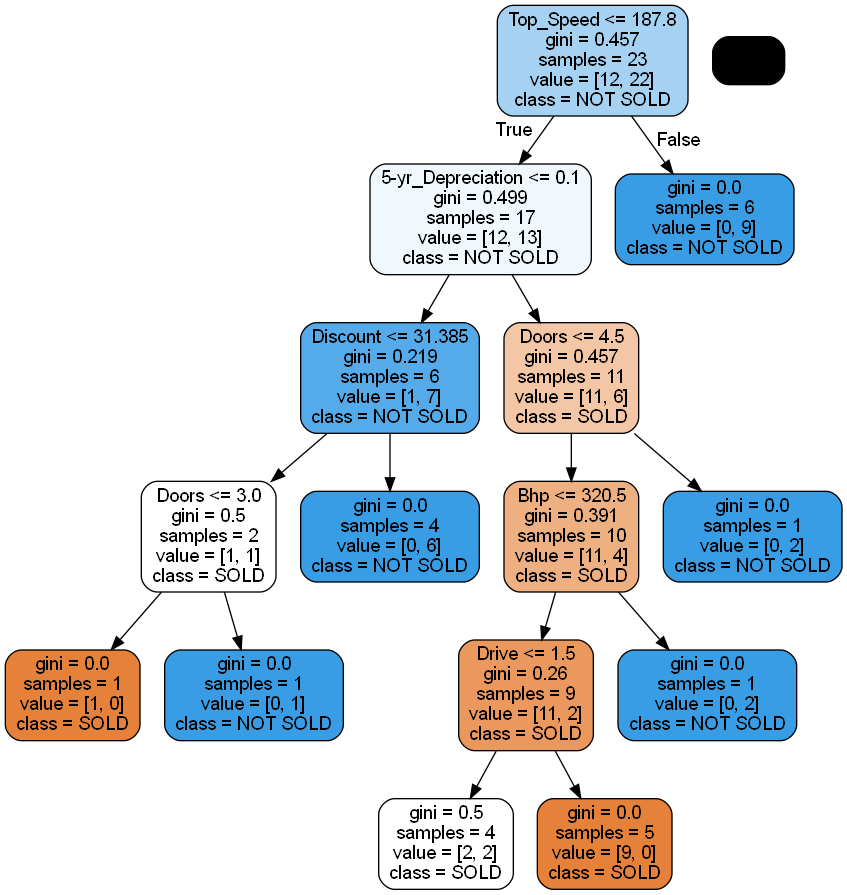

In [248]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

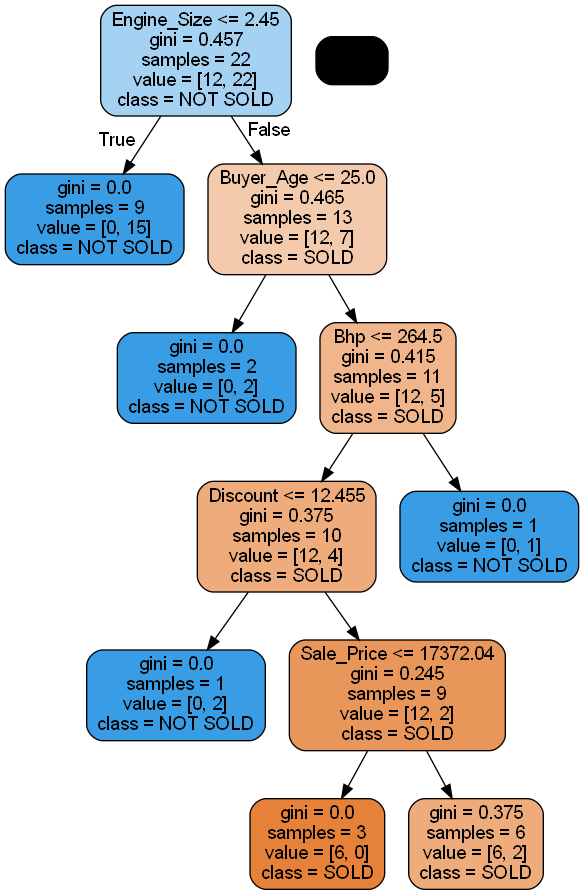

In [249]:
gph = get_dt_graph(rf.estimators_[2])
Image(gph.create_png(), width=700, height=700)

## Model Performance

In [250]:
evaluate_model(rf)

Train Accuracy : 0.9705882352941176
Train Confusion Matrix:
[[13  1]
 [ 0 20]]
--------------------------------------------------
Test Accuracy : 0.4666666666666667
Test Confusion Matrix:
[[0 6]
 [2 7]]


In [251]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [252]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4,5,6,7,8,9],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [253]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [254]:
%%time
grid_search.fit(x,y)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits
Wall time: 2min 56s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [255]:
rf_best = grid_search.best_estimator_

In [256]:
rf_best

RandomForestClassifier(max_depth=1, max_features=4, min_samples_leaf=10,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [257]:
evaluate_model(rf_best)

Train Accuracy : 0.7352941176470589
Train Confusion Matrix:
[[ 6  8]
 [ 1 19]]
--------------------------------------------------
Test Accuracy : 0.8
Test Confusion Matrix:
[[3 3]
 [0 9]]


In [258]:
sample_tree = rf_best.estimators_[0]

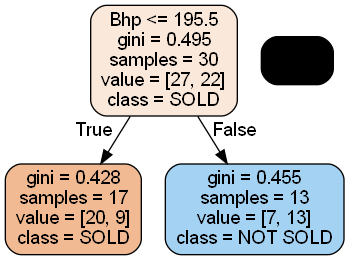

In [259]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

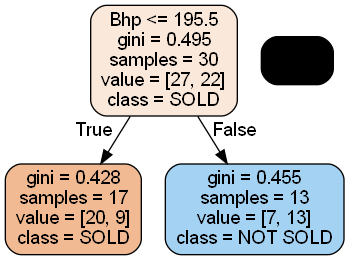

In [260]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

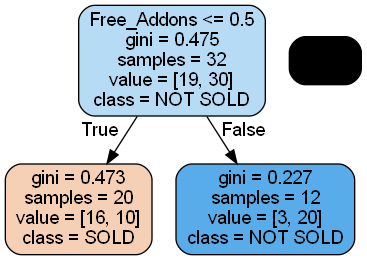

In [262]:
gph = get_dt_graph(rf_best.estimators_[5])
Image(gph.create_png(), height=600, width=600)

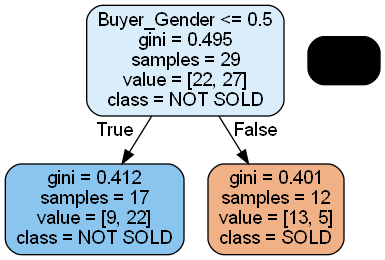

In [263]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

In [264]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [265]:
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [266]:
classifier_rf.feature_importances_

array([0.01728108, 0.11123422, 0.11120936, 0.1047435 , 0.09952228,
       0.0804858 , 0.0818462 , 0.09655448, 0.06241414, 0.01189137,
       0.12193304, 0.07072213, 0.03016241])

In [267]:
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [268]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,Engine_Size,0.121933
1,Buyer_Age,0.111234
2,Sale_Price,0.111209
3,Discount,0.104743
4,Resell_Price,0.099522
7,0-60_Time,0.096554
6,Top_Speed,0.081846
5,5-yr_Depreciation,0.080486
11,Bhp,0.070722
8,Free_Addons,0.062414


## Conclusion

Variable importance in RandomForest suggesta that Engine size had highest importance in deciding the buy rate
buyer age, sale price, discount and resell price are also of high impotance and they highly affect the customer to purchase
Free_Addons, BHP, Gender do not influemce the buyer to commit to buy a vehicle.